## Housing dataset using R

### Loading the libraries

In [67]:
pacman::p_load(pacman,dplyr,GGally,ggplot2,ggthemes,ggvis, httr,
              lubridate,plotly,rio,rmarkdown,shiny,stringr,tidyr)

### Read the data

In [68]:
house<-read.csv("house.csv",header=TRUE)

### Sample of the data

In [69]:
head(house)

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [70]:
cat('house has', dim(house)[1],"rows",'and', dim(house)[2],"columns")

house has 1460 rows and 81 columns

### Summary of the data

In [71]:
summary(house)

       Id           MSSubClass       MSZoning     LotFrontage    
 Min.   :   1.0   Min.   : 20.0   C (all):  10   Min.   : 21.00  
 1st Qu.: 365.8   1st Qu.: 20.0   FV     :  65   1st Qu.: 59.00  
 Median : 730.5   Median : 50.0   RH     :  16   Median : 69.00  
 Mean   : 730.5   Mean   : 56.9   RL     :1151   Mean   : 70.05  
 3rd Qu.:1095.2   3rd Qu.: 70.0   RM     : 218   3rd Qu.: 80.00  
 Max.   :1460.0   Max.   :190.0                  Max.   :313.00  
                                                 NA's   :259     
    LotArea        Street      Alley      LotShape  LandContour  Utilities   
 Min.   :  1300   Grvl:   6   Grvl:  50   IR1:484   Bnk:  63    AllPub:1459  
 1st Qu.:  7554   Pave:1454   Pave:  41   IR2: 41   HLS:  50    NoSeWa:   1  
 Median :  9478               NA's:1369   IR3: 10   Low:  36                 
 Mean   : 10517                           Reg:925   Lvl:1311                 
 3rd Qu.: 11602                                                              
 Max

In [72]:
str(house)

'data.frame':	1460 obs. of  81 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 5 4 ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley        : Factor w/ 2 levels "Grvl","Pave": NA NA NA NA NA NA NA NA NA NA ...
 $ LotShape     : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 1 1 1 1 4 1 4 4 ...
 $ LandContour  : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Utilities    : Factor w/ 2 levels "AllPub","NoSeWa": 1 1 1 1 1 1 1 1 1 1 ...
 $ LotConfig    : Factor w/ 5 levels "Corner","CulDSac",..: 5 3 5 1 3 5 5 1 5 1 ...
 $ LandSlope    : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood : Factor w/ 25 levels "Blmngtn","Blueste",..:

In [73]:
sum(sapply(house[,1:81], typeof) == "integer")
summary(house[,sapply(house[,1:81], typeof) == "integer"])

[1] 81

       Id           MSSubClass       MSZoning     LotFrontage    
 Min.   :   1.0   Min.   : 20.0   C (all):  10   Min.   : 21.00  
 1st Qu.: 365.8   1st Qu.: 20.0   FV     :  65   1st Qu.: 59.00  
 Median : 730.5   Median : 50.0   RH     :  16   Median : 69.00  
 Mean   : 730.5   Mean   : 56.9   RL     :1151   Mean   : 70.05  
 3rd Qu.:1095.2   3rd Qu.: 70.0   RM     : 218   3rd Qu.: 80.00  
 Max.   :1460.0   Max.   :190.0                  Max.   :313.00  
                                                 NA's   :259     
    LotArea        Street      Alley      LotShape  LandContour  Utilities   
 Min.   :  1300   Grvl:   6   Grvl:  50   IR1:484   Bnk:  63    AllPub:1459  
 1st Qu.:  7554   Pave:1454   Pave:  41   IR2: 41   HLS:  50    NoSeWa:   1  
 Median :  9478               NA's:1369   IR3: 10   Low:  36                 
 Mean   : 10517                           Reg:925   Lvl:1311                 
 3rd Qu.: 11602                                                              
 Max

### Treating missing Values 

In [54]:
colSums(sapply(house, is.na))

Id    MSSubClass      MSZoning   LotFrontage       LotArea 
            0             0             0           259             0 
       Street         Alley      LotShape   LandContour     Utilities 
            0          1369             0             0             0 
    LotConfig     LandSlope  Neighborhood    Condition1    Condition2 
            0             0             0             0             0 
     BldgType    HouseStyle   OverallQual   OverallCond     YearBuilt 
            0             0             0             0             0 
 YearRemodAdd     RoofStyle      RoofMatl   Exterior1st   Exterior2nd 
            0             0             0             0             0 
   MasVnrType    MasVnrArea     ExterQual     ExterCond    Foundation 
            8             8             0             0             0 
     BsmtQual      BsmtCond  BsmtExposure  BsmtFinType1    BsmtFinSF1 
           37            37            38            37             0 
 BsmtFinType2    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF       Heating 
           38             0             0             0             0 
    HeatingQC    CentralAir    Electrical     X1stFlrSF     X2ndFlrSF 
            0             0             1             0             0 
 LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath 
            0             0             0             0             0 
     HalfBath  BedroomAbvGr  KitchenAbvGr   KitchenQual  TotRmsAbvGrd 
            0             0             0             0             0 
   Functional    Fireplaces   FireplaceQu    GarageType   GarageYrBlt 
            0             0           690            81            81 
 GarageFinish    GarageCars    GarageArea    GarageQual    GarageCond 
           81             0             0            81            81 
   PavedDrive    WoodDeckSF   OpenPorchSF EnclosedPorch    X3SsnPorch 
            0             0             0             0             0 
  ScreenPorch      PoolArea        PoolQC         Fence   MiscFeature 
            0             0          1453          1179          1406 
      MiscVal        MoSold        YrSold      SaleType SaleCondition 
            0             0             0             0             0 
    SalePrice 
            0

In [74]:
Missing_indices <- sapply(house,function(x) sum(is.na(x)))
Missing_Summary <- data.frame(index = names(house),Missing_Values=Missing_indices)
Missing_Summary[Missing_Summary$Missing_Values > 0,]

,index,Missing_Values
LotFrontage,LotFrontage,259
Alley,Alley,1369
MasVnrType,MasVnrType,8
MasVnrArea,MasVnrArea,8
BsmtQual,BsmtQual,37
BsmtCond,BsmtCond,37
BsmtExposure,BsmtExposure,38
BsmtFinType1,BsmtFinType1,37
BsmtFinType2,BsmtFinType2,38
Electrical,Electrical,1


In [80]:
#Removing null values from each column



house$MasVnrType1 <- as.character(house$MasVnrType)
house$MasVnrType1[which(is.na(house$MasVnrType))] <- "None"
house$MasVnrType <- as.factor(house$MasVnrType1)
house <- subset(house,select = -MasVnrType1)
table(house$MasVnrType)


house$MasVnrArea[which(is.na(house$MasVnrArea))] <- mean(house$MasVnrArea,na.rm=T)

house$Alley1 <- as.character(house$Alley)
house$Alley1[which(is.na(house$Alley))] <- "None"
table(house$Alley1)

house$LotFrontage[which(is.na(house$LotFrontage))] <- median(house$LotFrontage,na.rm = T)

house$FireplaceQu1 <- as.character(house$FireplaceQu)
house$FireplaceQu1[which(is.na(house$FireplaceQu))] <- "None"
house$FireplaceQu <- as.factor(house$FireplaceQu1)
house <- subset(house,select = -FireplaceQu1)

house$PoolQC1 <- as.character(house$PoolQC)
house$PoolQC1[which(is.na(house$PoolQC))] <- "None"
house$PoolQC <- as.factor(house$PoolQC1)
house <- subset(house,select = -PoolQC1)

house$Fence1 <- as.character(house$Fence)
house$Fence1[which(is.na(house$Fence))] <- "None"
house$Fence <- as.factor(house$Fence1)
house <- subset(house,select = -Fence1)

house$MiscFeature1 <- as.character(house$MiscFeature)
house$MiscFeature1[which(is.na(house$MiscFeature))] <- "None"
house$MiscFeature <- as.factor(house$MiscFeature1)
house <- subset(house,select = -MiscFeature1)

house$GarageType1 <- as.character(house$GarageType)
house$GarageType1[which(is.na(house$GarageType))] <- "None"
house$GarageType <- as.factor(house$GarageType1)
house <- subset(house,select = -GarageType1)

house$GarageYrBlt[which(is.na(house$GarageYrBlt))] <- 0 

house$GarageFinish1 <- as.character(house$GarageFinish)
house$GarageFinish1[which(is.na(house$GarageFinish))] <- "None"
house$GarageFinish <- as.factor(house$GarageFinish1)
house <- subset(house,select = -GarageFinish1)

house$GarageQual1 <- as.character(house$GarageQual)
house$GarageQual1[which(is.na(house$GarageQual))] <- "None"
house$GarageQual <- as.factor(house$GarageQual1)
house <- subset(house,select = -GarageQual1)


 BrkCmn BrkFace    None   Stone 
     15     445     872     128 


Grvl None Pave 
  50 1369   41 

In [81]:
house$Alley <- as.factor(house$Alley1)
house <- subset(house,select = -Alley1)

In [82]:
house$GarageCond1 <- as.character(house$GarageCond)
house$GarageCond1[which(is.na(house$GarageCond))] <- "None"
house$GarageCond <- as.factor(house$GarageCond1)
house <- subset(house,select = -GarageCond1)

house$BsmtQual1 <- as.character(house$BsmtQual)
house$BsmtQual1[which(is.na(house$BsmtQual))] <- "None"
house$BsmtQual <- as.factor(house$BsmtQual1)
house <- subset(house,select = -BsmtQual1)

house$BsmtCond1 <- as.character(house$BsmtCond)
house$BsmtCond1[which(is.na(house$BsmtCond))] <- "None"
house$BsmtCond <- as.factor(house$BsmtCond1)
house <- subset(house,select = -BsmtCond1)

house$BsmtExposure1 <- as.character(house$BsmtExposure)
house$BsmtExposure1[which(is.na(house$BsmtExposure))] <- "None"
house$BsmtExposure <- as.factor(house$BsmtExposure1)
house <- subset(house,select = -BsmtExposure1)

house$BsmtFinType11 <- as.character(house$BsmtFinType1)
house$BsmtFinType11[which(is.na(house$BsmtFinType1))] <- "None"
house$BsmtFinType1 <- as.factor(house$BsmtFinType11)
house <- subset(house,select = -BsmtFinType11)

house$BsmtFinType21 <- as.character(house$BsmtFinType2)
house$BsmtFinType21[which(is.na(house$BsmtFinType2))] <- "None"
house$BsmtFinType2 <- as.factor(house$BsmtFinType21)
house <- subset(house,select = -BsmtFinType21)

house$Electrical1 <- as.character(house$Electrical)
house$Electrical1[which(is.na(house$Electrical))] <- "None"
house$Electrical <- as.factor(house$Electrical1)
house <- subset(house,select = -Electrical1)

In [79]:
colSums(sapply(house, is.na))

Id    MSSubClass      MSZoning   LotFrontage       LotArea 
            0             0             0           259             0 
       Street         Alley      LotShape   LandContour     Utilities 
            0          1369             0             0             0 
    LotConfig     LandSlope  Neighborhood    Condition1    Condition2 
            0             0             0             0             0 
     BldgType    HouseStyle   OverallQual   OverallCond     YearBuilt 
            0             0             0             0             0 
 YearRemodAdd     RoofStyle      RoofMatl   Exterior1st   Exterior2nd 
            0             0             0             0             0 
   MasVnrType    MasVnrArea     ExterQual     ExterCond    Foundation 
            8             8             0             0             0 
     BsmtQual      BsmtCond  BsmtExposure  BsmtFinType1    BsmtFinSF1 
           37            37            38            37             0 
 BsmtFinType2    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF       Heating 
           38             0             0             0             0 
    HeatingQC    CentralAir    Electrical     X1stFlrSF     X2ndFlrSF 
            0             0             1             0             0 
 LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath 
            0             0             0             0             0 
     HalfBath  BedroomAbvGr  KitchenAbvGr   KitchenQual  TotRmsAbvGrd 
            0             0             0             0             0 
   Functional    Fireplaces   FireplaceQu    GarageType   GarageYrBlt 
            0             0           690            81            81 
 GarageFinish    GarageCars    GarageArea    GarageQual    GarageCond 
           81             0             0            81            81 
   PavedDrive    WoodDeckSF   OpenPorchSF EnclosedPorch    X3SsnPorch 
            0             0             0             0             0 
  ScreenPorch      PoolArea        PoolQC         Fence   MiscFeature 
            0             0          1453          1179          1406 
      MiscVal        MoSold        YrSold      SaleType SaleCondition 
            0             0             0             0             0 
    SalePrice 
            0

### Exploratory Data Analysis

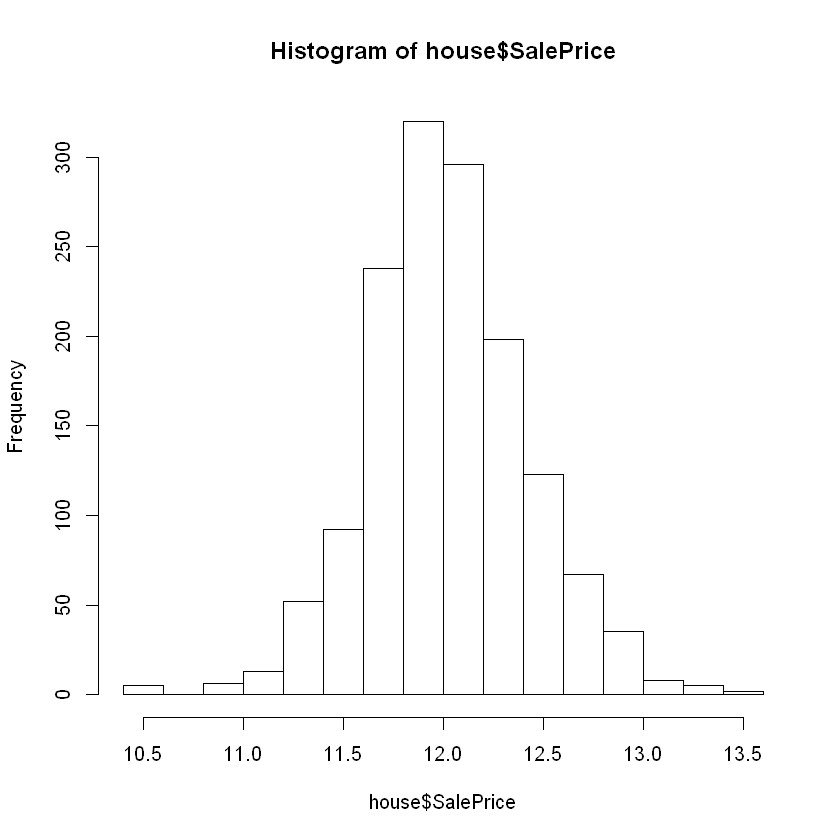

In [199]:
hist(house$SalePrice)

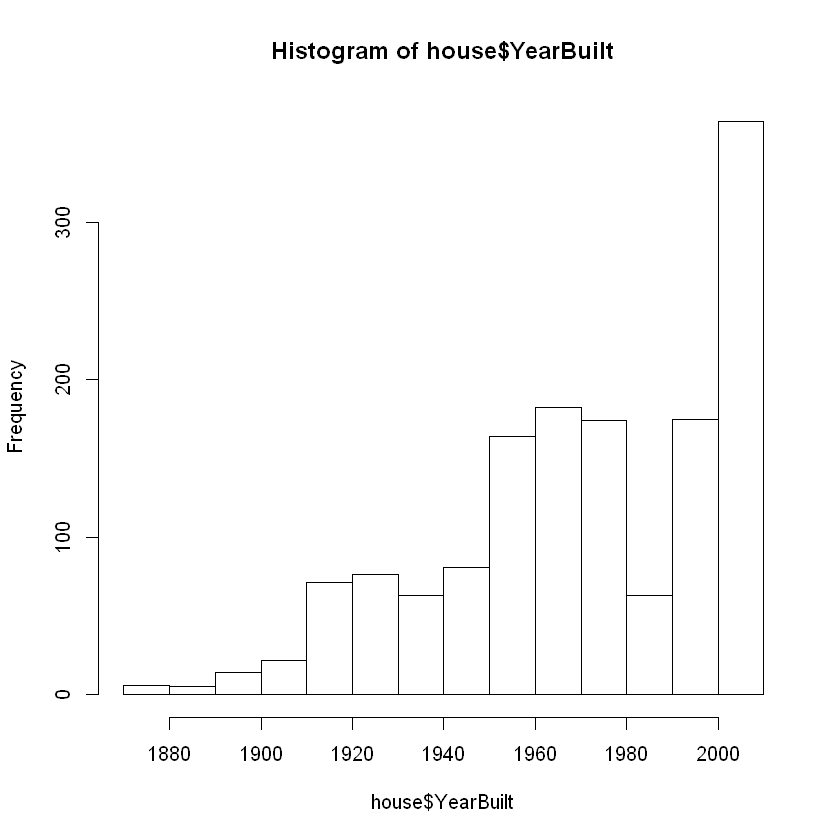

In [78]:
hist(house$YearBuilt)

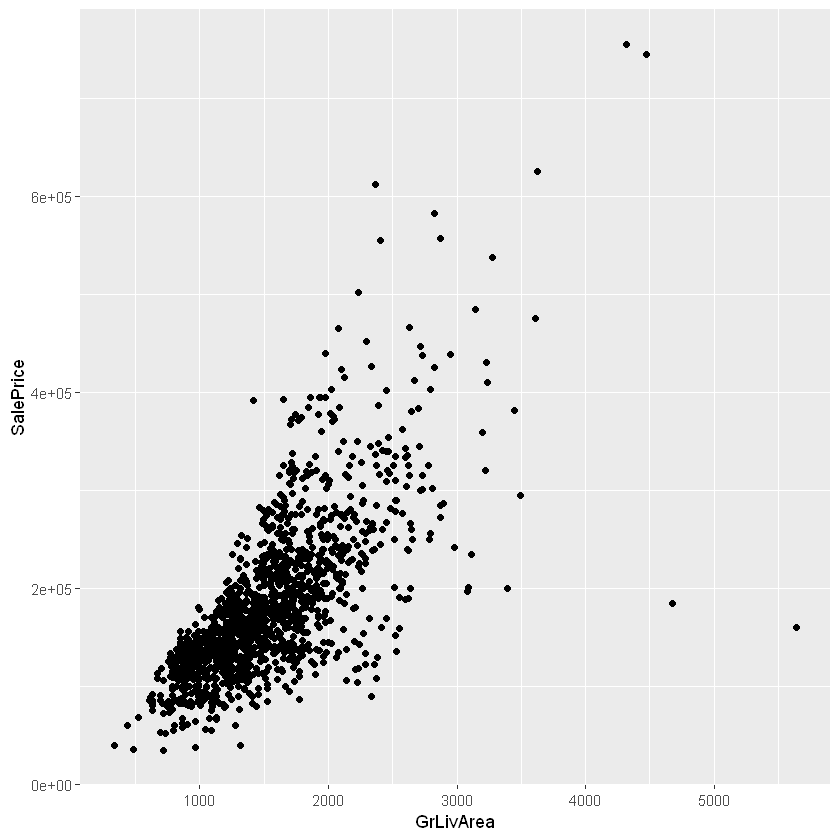

In [46]:
ggplot(house,aes(y=SalePrice,x=GrLivArea))+geom_point()

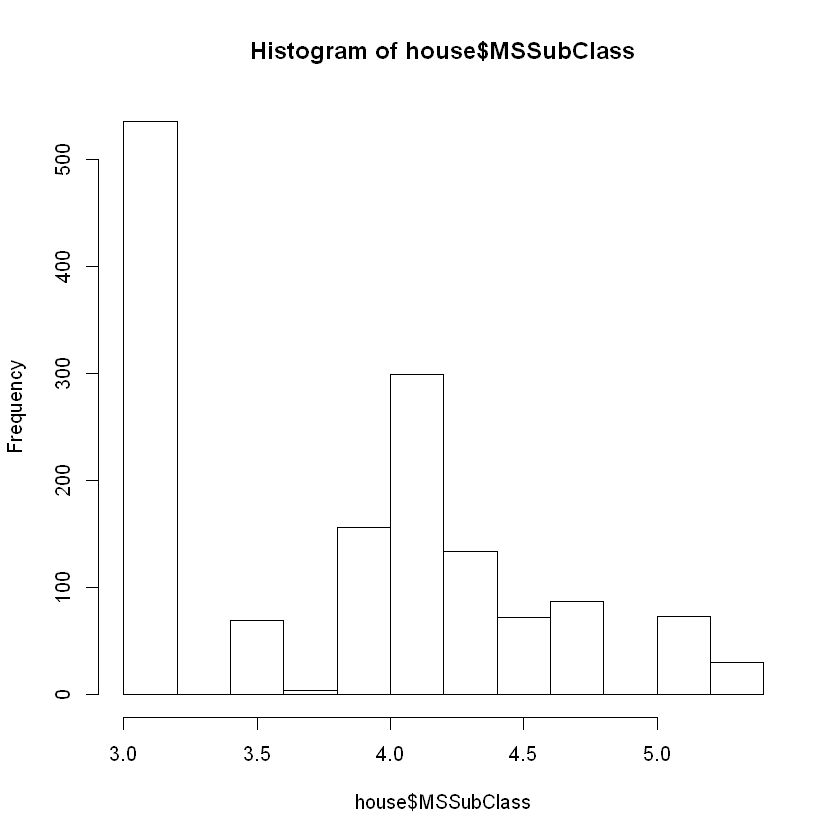

In [156]:
hist(house$MSSubClass)

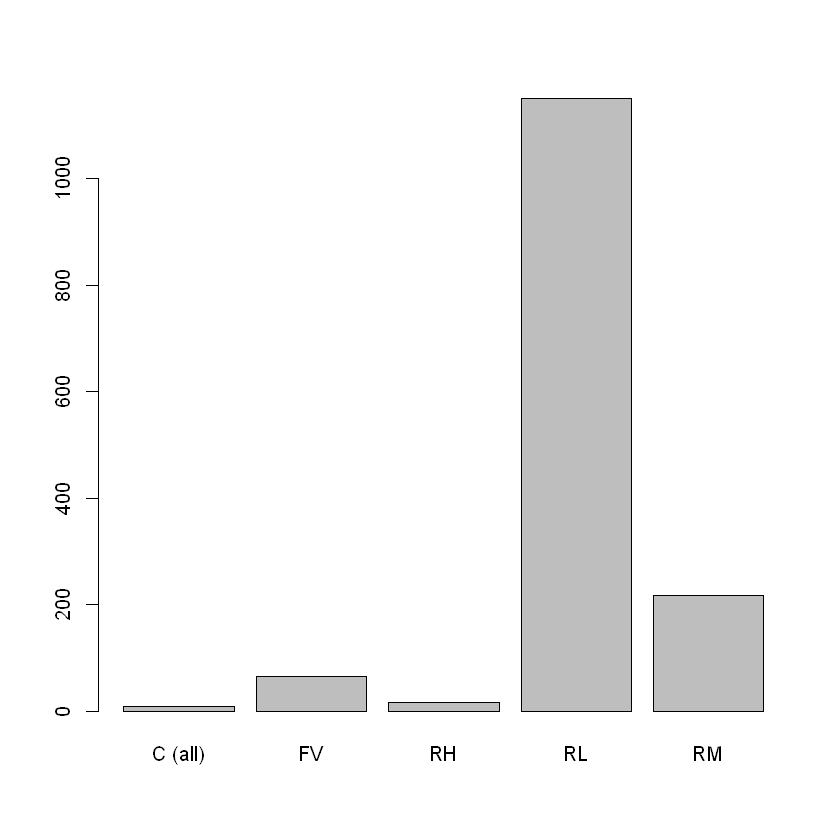

In [159]:
plot(house$MSZoning)

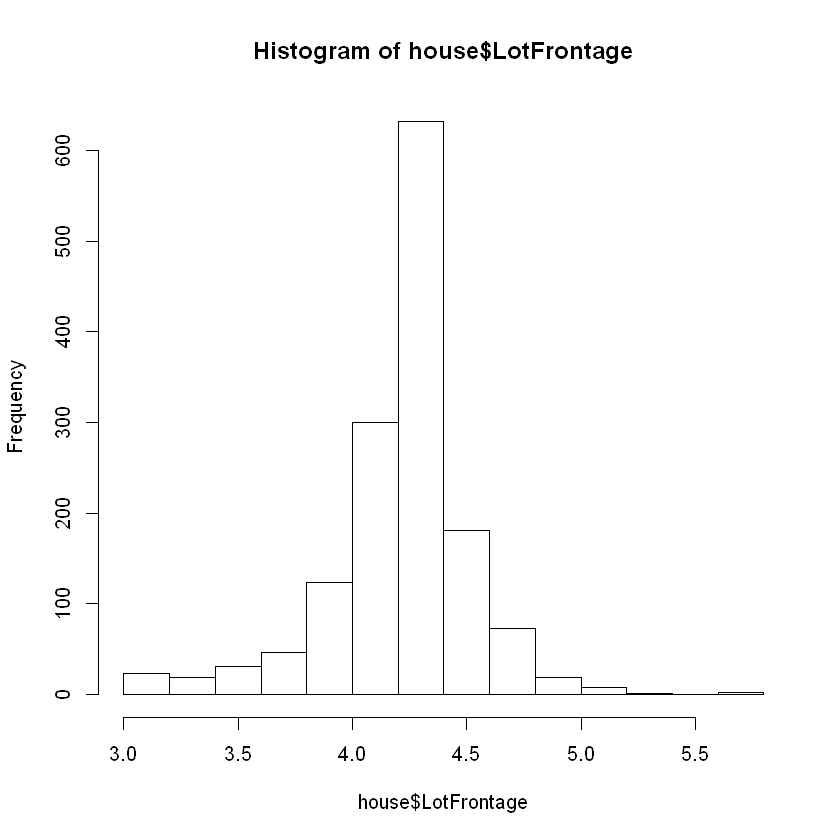

In [191]:
hist(house$LotFrontage)

ERROR: Error in UseMethod("groups"): no applicable method for 'groups' applied to an object of class "c('double', 'numeric')"


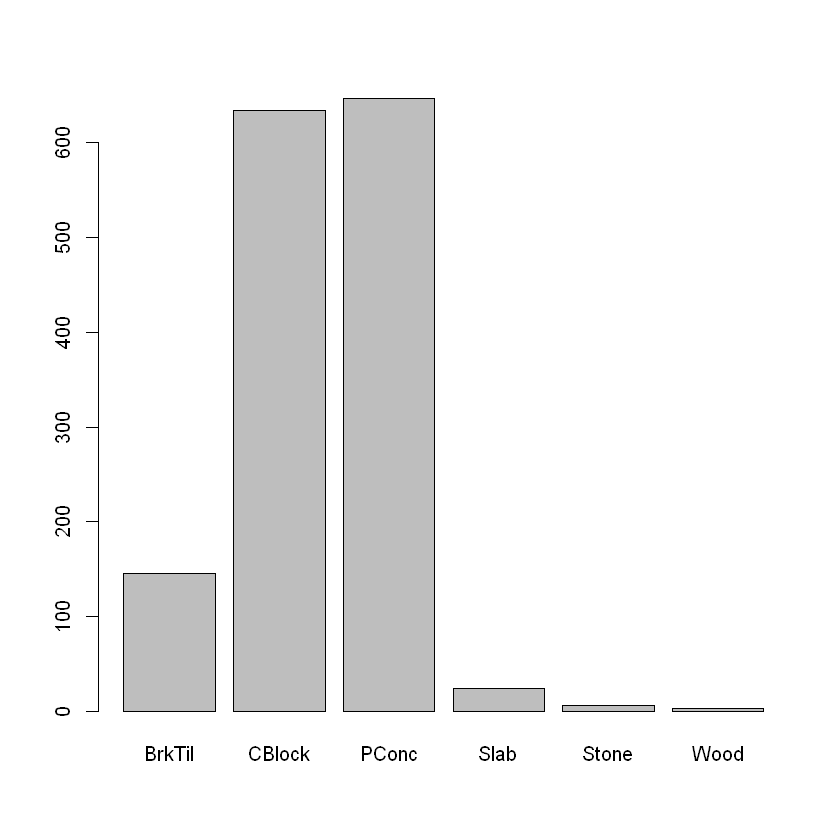

In [194]:
plot(house$Foundation)

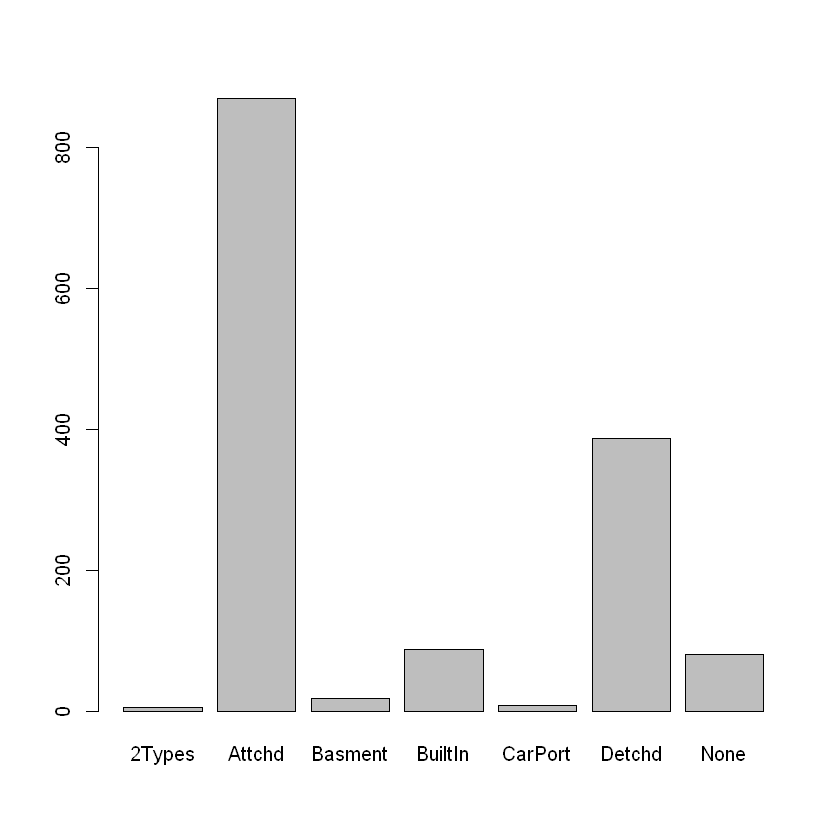

In [196]:
plot(house$GarageType)

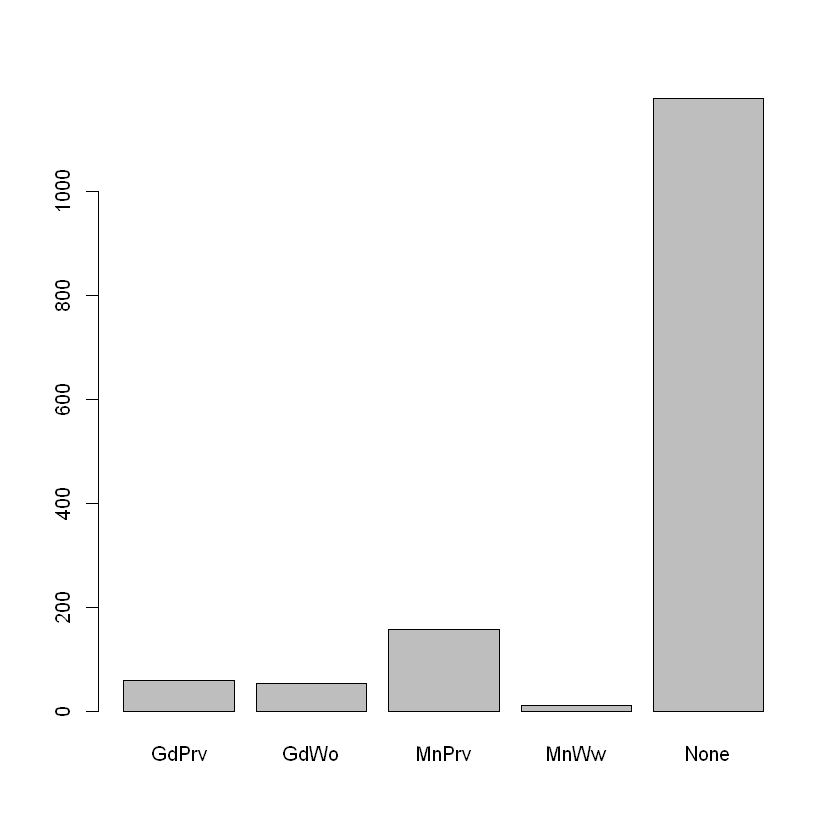

In [198]:
plot(house$Fence)

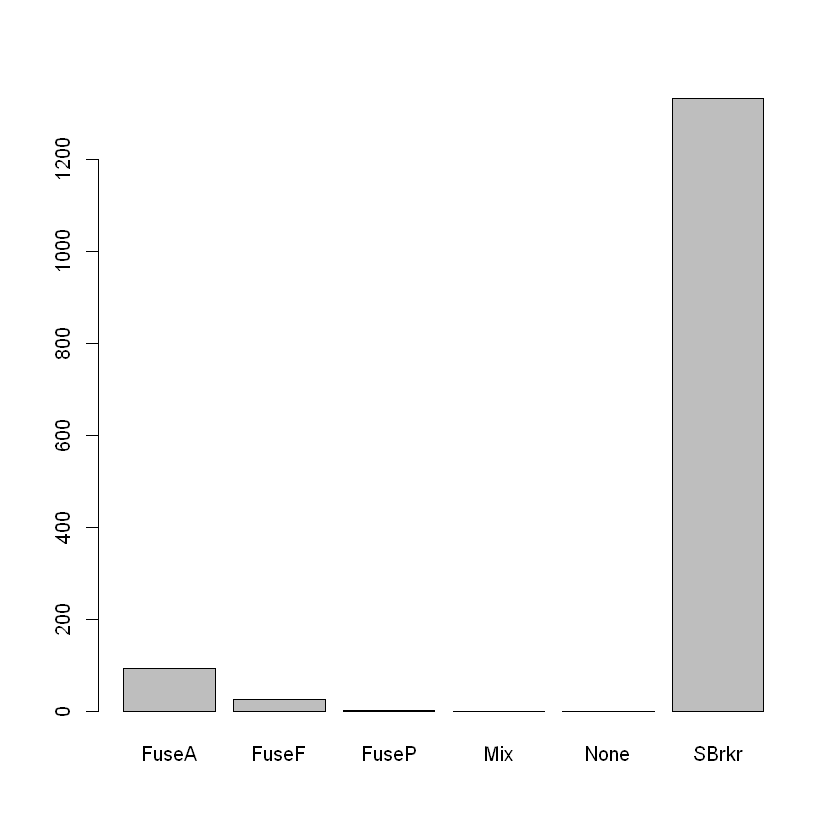

In [200]:
plot(house$Electrical)

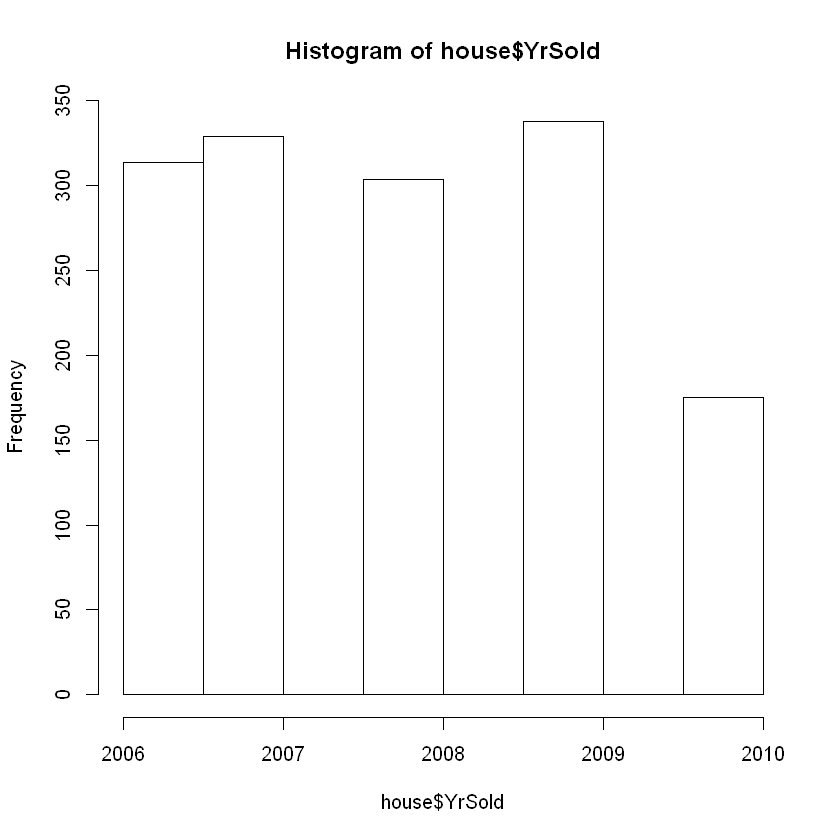

In [202]:
hist(house$YrSold)

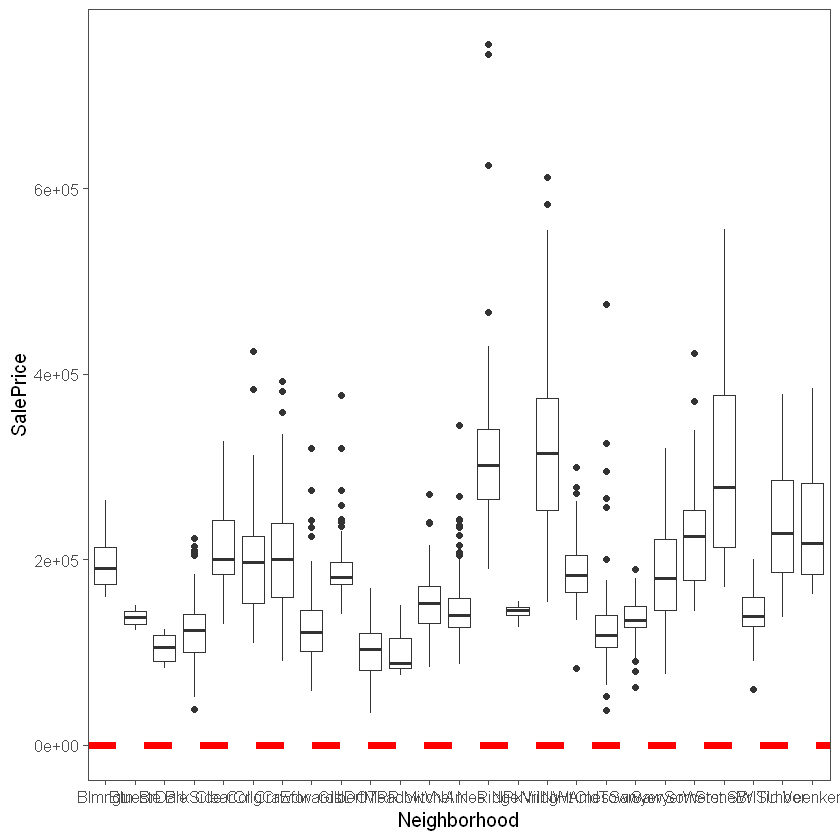

In [88]:
ggplot(house, aes(x = Neighborhood, y = SalePrice)) +
  geom_boxplot() +
  geom_hline(aes(yintercept=80), 
             colour='red', linetype='dashed', lwd=2) +
  scale_y_continuous() +
  theme_few()

In [89]:
library(corrplot)

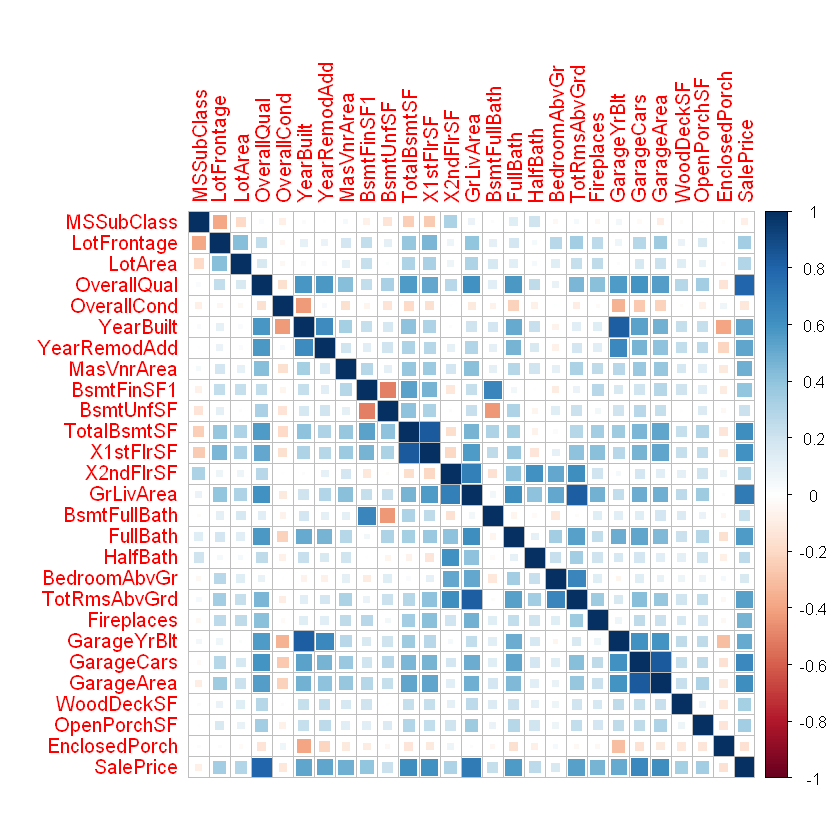

In [36]:
correlations <- cor(na.omit(train1_num[,-1]))

row_indic <- apply(correlations, 1, function(x) sum(x > 0.3 | x < -0.3) > 1)
correlations<- correlations[row_indic ,row_indic ]
corrplot(correlations, method="square")

### Fractorisation

In [92]:
house$MSZoning<- factor(house$MSZoning)
house$Street <- factor(house$Street)
house$LotShape <-factor(house$LotShape )
house$LandContour<-factor(house$LandContour)
house$Utilities<-factor(house$Utilities)
house$LotConfig<-factor(house$LotConfig)
house$LandSlope<-factor(house$LandSlope)
house$Neighborhood<-factor(house$Neighborhood)
house$Condition1<-factor(house$Condition1)
house$Condition2<-factor(house$Condition2)
house$BldgType<-factor(house$BldgType)
house$HouseStyle<-factor(house$HouseStyle)
house$RoofStyle<-factor(house$RoofStyle)
house$RoofMatl<-factor(house$RoofMatl)
house$Exterior1st<-factor(house$Exterior1st)
house$Exterior2nd<-factor(house$Exterior2nd)
house$ExterQual<-factor(house$ExterQual)
house$ExterCond<-factor(house$ExterCond)
house$Foundation<-factor(house$Foundation)
house$Heating<-factor(house$Heating)
house$HeatingQC<-factor(house$HeatingQC)
house$CentralAir<-factor(house$CentralAir)
house$KitchenQual<-factor(house$KitchenQual)
house$Functional<-factor(house$Functional)
house$PavedDrive<-factor(house$PavedDrive)
house$SaleType<-factor(house$SaleType)
house$SaleCondition<-factor(house$SaleCondition)
str(house)

'data.frame':	1460 obs. of  81 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 5 4 ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 69 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley        : Factor w/ 3 levels "Grvl","None",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ LotShape     : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 1 1 1 1 4 1 4 4 ...
 $ LandContour  : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Utilities    : Factor w/ 2 levels "AllPub","NoSeWa": 1 1 1 1 1 1 1 1 1 1 ...
 $ LotConfig    : Factor w/ 5 levels "Corner","CulDSac",..: 5 3 5 1 3 5 5 1 5 1 ...
 $ LandSlope    : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood : Factor w/ 25 levels "Blmngtn","Blueste",..: 6 25 6

In [94]:
Column_classes <- sapply(names(house),function(x){class(house[[x]])})
numeric_columns <-names(Column_classes[Column_classes != "factor"])

In [95]:
skew <- sapply(numeric_columns,function(x){skewness(house[[x]],na.rm = T)})

ERROR: Error in skewness(house[[x]], na.rm = T): could not find function "skewness"


In [103]:
library(e1071)

Warning message:
"package 'e1071' was built under R version 3.6.3"

In [104]:
skew <- sapply(numeric_columns,function(x){skewness(house[[x]],na.rm = T)})

In [105]:
skew <- skew[skew > 0.75]

In [106]:
for(x in names(skew)) 
{
  house[[x]] <- log(house[[x]] + 1)
}

### Splitting Training & Testing Data

In [146]:
smp_size <- floor(0.75 * nrow(house))

## set the seed to make your partition reproducible
set.seed(1)
train_ind <- sample(seq_len(nrow(house)), size = smp_size)

train <- house[train_ind, ]
test <- house[-train_ind, ]

### Fitting & Prediction

In [147]:
model <- lm(SalePrice~.,data = train_new)

In [148]:
summary(model)


Call:
lm(formula = SalePrice ~ ., data = train_new)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52912 -0.04117  0.00000  0.04622  0.28920 

Coefficients: (10 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           6.402e+00  8.625e+00   0.742 0.458211    
Id                    1.600e-07  9.478e-06   0.017 0.986538    
MSSubClass           -5.241e-03  2.085e-02  -0.251 0.801590    
MSZoningFV            7.411e-02  9.550e-02   0.776 0.438051    
MSZoningRH            1.615e-02  9.557e-02   0.169 0.865892    
MSZoningRL           -2.849e-03  8.878e-02  -0.032 0.974411    
MSZoningRM           -1.449e-02  8.538e-02  -0.170 0.865261    
LotFrontage          -2.038e-02  2.189e-02  -0.931 0.352284    
LotArea               8.274e-02  1.673e-02   4.945 9.95e-07 ***
StreetPave            4.036e-01  1.040e-01   3.882 0.000115 ***
AlleyNone            -1.100e-03  2.787e-02  -0.039 0.968525    
AlleyPave         

In [150]:
pred <- predict(house_model,test)

Warning message in predict.lm(house_model, test):
"prediction from a rank-deficient fit may be misleading"

In [151]:
actual <-test$SalePrice
rss <- sum((prediction - actual) ^ 2)  ## residual sum of squares
tss <- sum((actual - mean(actual)) ^ 2)  ## total sum of squares
rsq <- 1 - rss/tss
rsq

[1] 0.9482814